# US Police Shootings Analysis

Name : Ferry Marcellus Suhendra


## Introductions

The United States of America is one of the most firearm populated country in the world. Shootings done by civilians and law enforcers are both a common occurence in this country. Fatal Interventions by the police is one of known issues in public safety in the United States. Prior research has stated that age and race is central to the logics that police and legal systems use to decide who to target, how to intervene, and how much force should be applied in the process of policing (Soss & Weaver, 2017).  A 2015 45-state study also reported that civilians diagnosed with schizophrenia were more than three times more likely than the general population to die due to legal intervention (Olfson *et al*, 2015). 

#### Problem Statement

To investigate trends in police shootings towards different demographics of US citizens from January 2015 to June 2022.


#### Problem Description

1. what is the racial percentages of police shooting victims?
2. what percentage of police shooting victims were attacking?
3. what percentage of police shooting victims have mental illness?
4. what is the gender percentage of police shooting victims?
5. how is the state distribution of police shooting cases?
6. what is the central tendency of the victims age distribution?
7. Is there a corelation between race and threat level of police shooting victims?

### Data Loading

In [2]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 


Dataframe is downloaded from kaggle

link: https://www.kaggle.com/code/jacklacey/deadly-shootings-breakdown/data

In [3]:
# loading dataframe
df=pd.read_csv('US Police shootings in from 2015-22.csv')
df


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,7678,NaN,2022-08-23,shot,unknown weapon,NaN,M,NaN,Harris County,TX,False,other,Foot,False,-95.479,29.963,True
7678,7679,NaN,2022-08-23,shot,machete,48.0,M,NaN,San Diego,CA,False,other,Not fleeing,False,-117.108,32.723,True
7679,7680,Geraldo Reyes,2022-08-23,shot,gun,32.0,M,NaN,Cut Off,LA,False,attack,NaN,False,-90.312,29.458,True
7680,7681,NaN,2022-08-23,shot,gun,NaN,M,NaN,Blue Springs,MO,False,attack,Foot,False,-94.258,39.023,True


### Data cleaning

In [4]:
# removing unused column
dfc=df.drop(['body_camera','longitude','latitude','is_geocoding_exact','flee','armed'],axis=1)
# checking dataframe data type
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7682 non-null   int64  
 1   name                     7275 non-null   object 
 2   date                     7682 non-null   object 
 3   manner_of_death          7682 non-null   object 
 4   age                      7210 non-null   float64
 5   gender                   7663 non-null   object 
 6   race                     6244 non-null   object 
 7   city                     7682 non-null   object 
 8   state                    7682 non-null   object 
 9   signs_of_mental_illness  7682 non-null   bool   
 10  threat_level             7682 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 607.8+ KB


In [5]:
# changing the date column into datetime format
dfc['date']=pd.to_datetime(dfc['date'])
dfc['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7682 entries, 0 to 7681
Series name: date
Non-Null Count  Dtype         
--------------  -----         
7682 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 60.1 KB


In [6]:
# querying data from January 2015 to June 2022
dfx=dfc[dfc['date']<'2022-08-01']
dfx

,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level
0,1,Tim Elliot,2015-01-02,shot,53.0,M,A,Shelton,WA,True,attack
1,2,Lewis Lee Lembke,2015-01-02,shot,47.0,M,W,Aloha,OR,False,attack
2,3,John Paul Quintero,2015-01-03,shot and Tasered,23.0,M,H,Wichita,KS,False,other
3,4,Matthew Hoffman,2015-01-04,shot,32.0,M,W,San Francisco,CA,True,attack
4,5,Michael Rodriguez,2015-01-04,shot,39.0,M,H,Evans,CO,False,attack
...,...,...,...,...,...,...,...,...,...,...,...
7627,7628,NaN,2022-07-30,shot,NaN,M,NaN,Crook County,WY,False,attack
7628,7629,NaN,2022-07-30,shot,NaN,M,NaN,Port Richey,FL,False,attack
7629,7630,Mark Allen,2022-07-30,shot,67.0,M,NaN,Canton,GA,False,other
7630,7631,Darrin Baker,2022-07-31,shot,56.0,M,NaN,Greenfield,IN,False,attack


In [7]:
# replacing null values
dfx.fillna(value='unidentified',inplace=True)

dfx.sample(10)


C:\Users\Ferry Marcellus\AppData\Local\Temp\ipykernel_4892\2686323532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx.fillna(value='unidentified',inplace=True)


,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level
2388,2389,Robin Blaylock,2017-06-10,shot,53.0,M,W,North English,IA,False,other
4772,4773,Tammy Pierce,2019-11-11,shot,59.0,F,W,Loveland,CO,False,attack
7572,7573,Romayne Manuel,2022-07-13,shot,31.0,M,unidentified,Grand Prairie,TX,False,other
2372,2373,Adrian Maurice Hardeman,2017-06-05,shot,37.0,M,B,Gonzales County,TX,False,other
471,472,Arturo Lopez,2015-07-03,shot,46.0,M,H,Lancaster,CA,False,attack
2647,2648,Rodolfo Ballardo,2017-09-13,shot,31.0,M,H,Quartzsite,AZ,False,attack
5960,5961,Ashli Babbitt,2021-01-06,shot,35.0,F,W,Washington,DC,False,attack
2407,2408,Nathan Banks,2017-06-16,shot,37.0,M,W,Antioch,CA,False,other
766,767,Kevin Lau,2015-10-11,shot,44.0,M,A,Lakes Charles,LA,False,attack
6972,6973,Mark A. Beilby,2021-12-22,shot,24.0,M,unidentified,Unadilla,NY,False,other


In [8]:
# saving cleaned dataframe as .csv
dfx.to_csv('US Police shootings in from 2015-22(clean).csv')

### Analysis

W               0.416929
B               0.219602
unidentified    0.182259
H               0.147668
A               0.014675
N               0.012710
O               0.006158
Name: race, dtype: float64


<AxesSubplot:ylabel='race'>

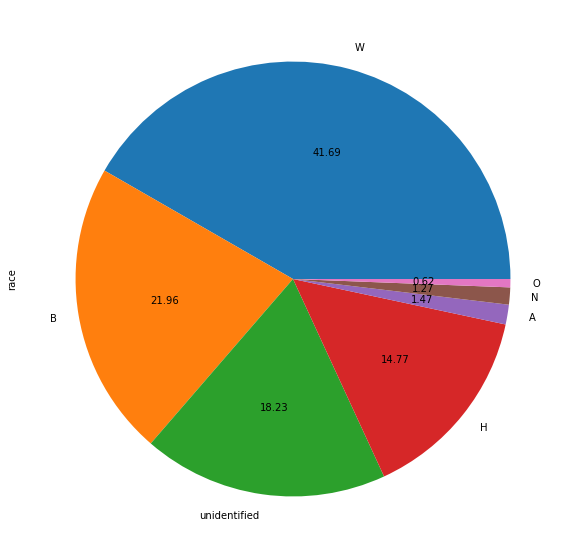

In [9]:
#1. what is the racial percentages of police shooting victims?

print(dfx.race.value_counts(normalize=True))
dfx.race.value_counts(normalize=True).plot(kind='pie',autopct='%.2f',figsize=(10,10))

The chart above displays the percentage of victims racial attribute. the letters in the chart means as follows:
- W = White
- B = Black
- H = Hispanic
- A = Asian
- N = Native American
- O = Others

Based from the chart, the majorities (41,69%) of fatalities are from the white polulation. this is a normal outcome because the majority of US citizen are white. The percentage is followed by Blacks (21.96%) and hispanics (14.77%). the percentage of black and hispanic deaths are quite high when compared to the whole demographic of the US population.

attack          0.631813
other           0.329927
undetermined    0.038260
Name: threat_level, dtype: float64


<AxesSubplot:ylabel='threat_level'>

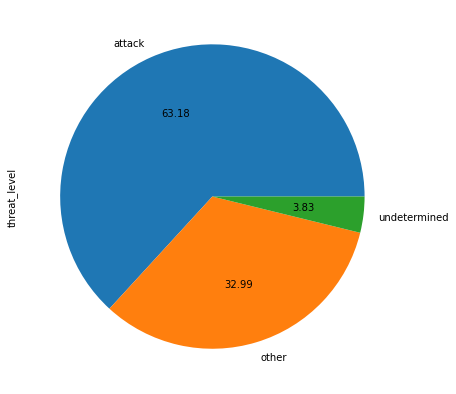

In [10]:
#2. what percentage of police shooting victims were attacking?

print(dfx.threat_level.value_counts(normalize=True))
dfx.threat_level.value_counts(normalize=True).plot(kind='pie',autopct='%.2f',figsize=(7,7))

Based on the above pie chart, 63.18% of all victims to police shootings were actively figthing back during the altercation. This means the police mostly only shoot as a form of self defence or protection.

False    0.787605
True     0.212395
Name: signs_of_mental_illness, dtype: float64


<AxesSubplot:ylabel='signs_of_mental_illness'>

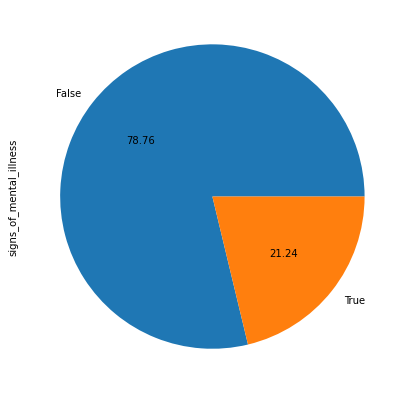

In [11]:
#3. what percentage of police shooting victims have mental illness?
print(dfx.signs_of_mental_illness.value_counts(normalize=True))
dfx.signs_of_mental_illness.value_counts(normalize=True).plot(kind='pie',autopct='%.2f',figsize=(7,7))

21.24% of victims to police shooting has been confirmed to have mental illnesses. while this is a minority in total cases. it is a relatively large number compared to the percentage of mentally ill people in the US population.

M               0.952830
F               0.044942
unidentified    0.002227
Name: gender, dtype: float64


<AxesSubplot:ylabel='gender'>

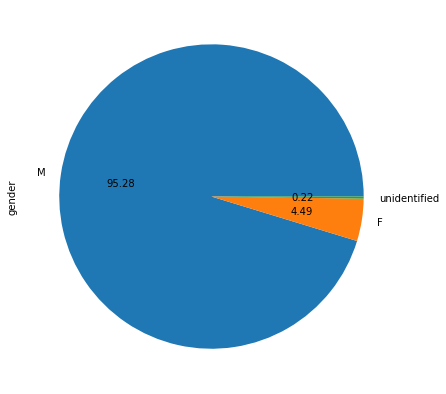

In [12]:
#4. what is the gender percentage of police shooting victims?
print(dfx.gender.value_counts(normalize=True))
dfx.gender.value_counts(normalize=True).plot(kind='pie',autopct='%.2f',figsize=(7,7))

Males are a very large majority of police shooting victims with 95.28% of shootings victim being male.

state
RI       6
VT      12
DE      17
ND      17
NH      22
CT      22
WY      24
DC      24
SD      26
ME      33
HI      37
NE      38
IA      46
MT      48
AK      52
MA      54
ID      62
KS      71
WV      71
MN      85
UT      87
NJ      87
MS      97
MD     107
AR     108
WI     114
NV     123
SC     123
OR     124
MI     129
VA     134
NY     140
IN     140
KY     140
AL     142
LA     153
IL     155
PA     157
NM     163
MO     196
WA     205
TN     208
OK     211
OH     215
NC     215
CO     277
GA     287
AZ     348
FL     488
TX     685
CA    1107
Name: id, dtype: int64


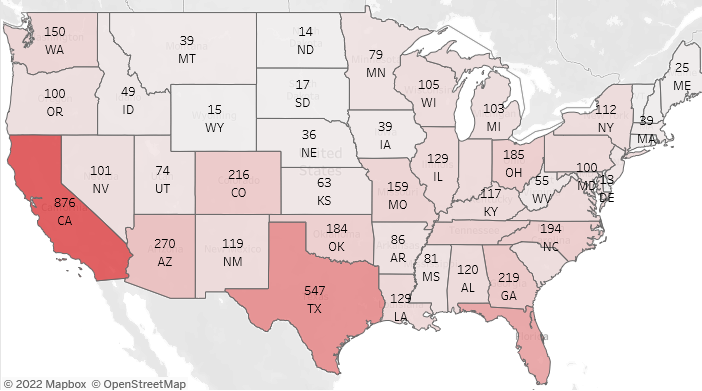

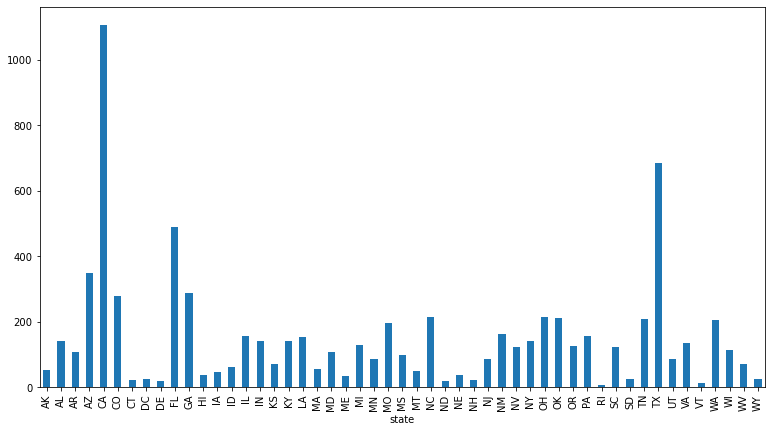

In [15]:
#5. how is the state distribution of police shooting cases?
print(dfx.groupby(dfx['state'])['id'].count().sort_values())
dfx.groupby(dfx['state'])['id'].count().plot(kind='bar', figsize=(13,7))

# Showing map chart from tableu
from PIL import Image
myImage = Image.open("Map.png")
myImage

California have the highest cases count followed by Texas and Florida. since January of 2015 to June of 2022, California had 1107 cases, Texas had 685 cases, and florida had 488 cases.

In [ ]:
#6. what is the central tendency of the victims age distribution?

print('average age:',dfx[dfx['age']!='unidentified']['age'].mean())
print('middle value:',dfx[dfx['age']!='unidentified']['age'].median())
print('modus:',dfx[dfx['age']!='unidentified']['age'].mode())

average age: 37.15094076655052
middle value: 35.0
modus: 0    31.0
Name: age, dtype: object


From the central tendencies, it is found that most of the victims of police shootings are aged around their 30s. the average age is 37 years old, the middle value is 35 years old, and victims with 31 years of age appears with the highest frequency.

In [ ]:
#7. Is there a corelation between race and threat level of police shooting victims?

# Defining hypothesis
# H0= race and threat level are unrelated
# Ha= race and threat level are related

#creating a contingency table
ct=pd.crosstab(dfx["race"],dfx["threat_level"])
ct.drop('unidentified', axis=0, inplace=True)
ct.drop('undetermined', axis=1, inplace=True)
# checking the dependency of race and threat level
stat, p, dof, expected = stats.chi2_contingency(ct)
print(ct)
print('p=%.8f' %(p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

threat_level  attack  other
race                       
A                 59     51
B               1116    499
H                655    439
N                 56     36
O                 31     16
W               2071   1012
p=0.00000109
Probably dependent


Statistical analysis shows that there is a definite correlation between victims race and their likelihood to attack or threathen police officers. This means certain race is more likely to attack police officer in the event of an altercation.

## Conclusions

Trends of police shootings between January 2015 and June 2022 indicates that there are certain bias when it comes to the demographics of suspects who are shot. Race, age, gender, and mental condition plays a part in the chances to become a victim of police shootings. In gender, male suspects is more likely to be shot considering 95.28% of victims are male. suspects in their 30s are also more likely to be shot. Mental condition also becomes a point of interest as  21.24% of shooting victims have mental illness. There are also bias when it comes to race. White citizens encompassed 41,69% of fatalities,followed by blacks at 21.96% and hispanics at 14.77%. In addition, certain race are more likely to be hostile to police officer which in turn increase their chances to be shot by said police during an arrest. Therefore it can be understood that police sets preference and bias when it comes to dealing with suspects from certain demographics. Location also plays an important role in the chances of getting shot by the police. California, Texas, and Florida are the 3 states with the highest police shooting cases with 1107, 685, and 488 cases respectively.

#### Dashboard url

https://public.tableau.com/views/h8dsft_Milestone1_FerryMSuhendra/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

#### References

J. Soss, V. Weaver, Learning from Ferguson: Policing, race, and class in American politics. Annu. Rev. Polit. Sci. 20, 565–591 (2017).

Olfson, M., Gerhard, T., Huang, C., Crystal, S., & Stroup, T. S. (2015). Premature mortality
among adults with schizophrenia in the United States. JAMA Psychiatry, 72(12),
1172–1181.
